## Import Python Libraries

In [127]:
import matplotlib.pyplot as plt
import numpy as np

# Different Methods To Obtain Roots Numerically

## Besection Method

In [128]:
def bisection_method(f, a, b, tol=1e-6, max_iter=100):
    if f(a)*f(b) > 0:
        print("Bisection method is not applicable")
        return None
    iter_count = 0
    estimates = []
    while ((b-a)/2.0 > tol) and (iter_count < max_iter):
        c = (a+b)/2.0
        estimates.append(c)
        if f(c) == 0:
            break
        elif f(a)*f(c) < 0:
            b = c
        else:
            a = c
        iter_count += 1
    return estimates

def f(x):
    return x**2 - 4


Root Obtained = 2.0000006675720217


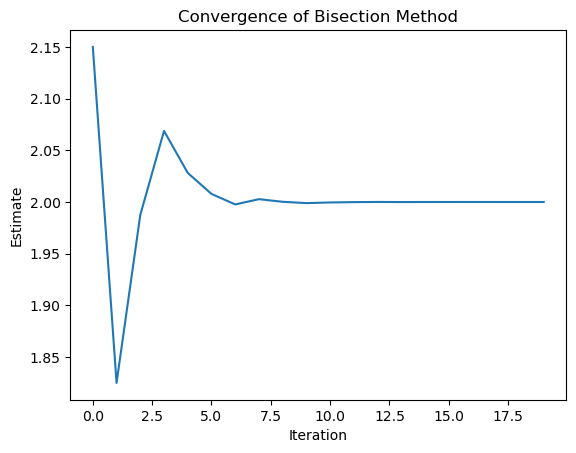

In [129]:
estimates = bisection_method(f,1.5,2.8)
print ("Root Obtained =",estimates[-1])

plt.figure()
plt.title('Convergence of Bisection Method')
plt.xlabel('Iteration')
plt.ylabel('Estimate')
plt.plot(estimates)
plt.show()

## Newton Raphson

In [130]:
def newton_raphson(f, df, x0, tol=1e-6, max_iter=100):
    iter_count = 0
    estimates = []
    while (abs(f(x0)) > tol) and (iter_count < max_iter):
        x0 = x0 - f(x0)/df(x0)
        estimates.append(x0)
        iter_count += 1
    return estimates

def f(x):
    return x**2 - 4

def df(x):
    return 2*x

Root Obtained = 2.0000000000001203


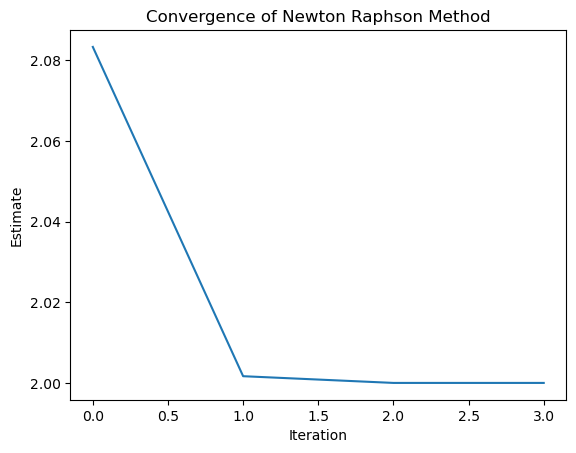

In [131]:
initial_guess = 1.5
estimates = newton_raphson(f,df,initial_guess)
print ("Root Obtained =",estimates[-1])

plt.figure()
plt.title('Convergence of Newton Raphson Method')
plt.xlabel('Iteration')
plt.ylabel('Estimate')
plt.plot(estimates)
plt.show()

## Regula Falsi

In [132]:
def regula_falsi(f, a, b, tol=1e-6, max_iter=100):
    if f(a)*f(b) > 0:
        print("Regula Falsi method is not applicable.")
        return None
    iter_count = 0
    c = a
    estimates = []
    while ((abs(f(c)) > tol) and (iter_count < max_iter)):
        c = a - ((b - a) / (f(b) - f(a))) * f(a)
        estimates.append(c)
        if f(c) == 0:
            print("Found exact solution.")
            break
        elif f(a)*f(c) < 0:
            b = c
        else:
            a = c
        iter_count += 1
    return estimates

def f(x):
    return x**2 - 4


Root Obtained = 1.9999998805284847


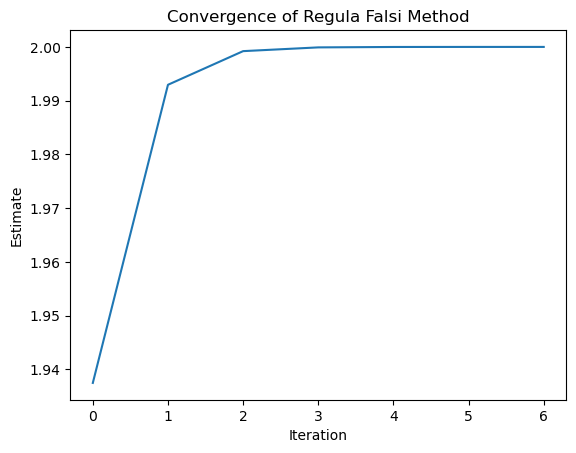

In [133]:
estimates = regula_falsi(f,1.5,2.5)
print ("Root Obtained =",estimates[-1])

plt.figure()
plt.title('Convergence of Regula Falsi Method')
plt.xlabel('Iteration')
plt.ylabel('Estimate')
plt.plot(estimates)
plt.show()

## Secant Method

In [134]:
def secant_method(f, x0, x1, tol=1e-6, max_iter=100):
    iter_count = 0
    estimates = []
    while (abs(x1-x0) > tol) and (iter_count < max_iter):
        x0, x1 = x1, x1 - f(x1)*((x1-x0)/(f(x1)-f(x0)))
        estimates.append(x1)
        iter_count += 1
    return estimates


def f(x):
    return x**2 - 4

Root Obtained = 1.999999999994471


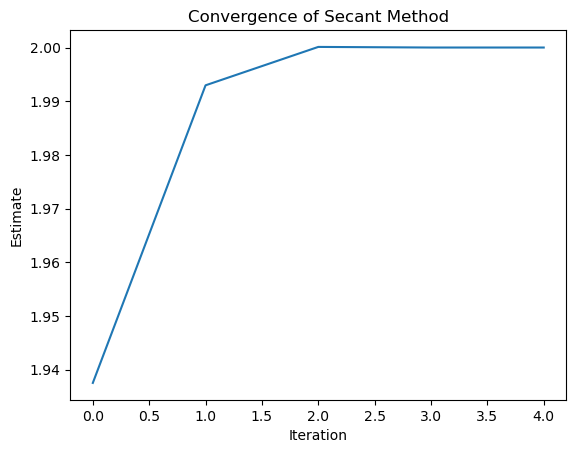

In [135]:
estimates = secant_method(f,1.5,2.5)
print ("Root Obtained =",estimates[-1])

plt.figure()
plt.title('Convergence of Secant Method')
plt.xlabel('Iteration')
plt.ylabel('Estimate')
plt.plot(estimates)
plt.show()

## Fixed Point Method

In [136]:
def fixed_point_iteration(g,x0, tol=1e-6, max_iter=100):
    x = x0
    estimates = [x]
    for i in range(max_iter):
        x_new = g(x)
        estimates.append(x_new)
        if abs(x_new - x) < tol:
            return estimates
        x = x_new
    return None

def f(x):
    return x**2 - x - 1

def g(x):
    # Express the equation as x = g(x)
    return 1 + 1/x




Root Obtained = 1.618033813400125


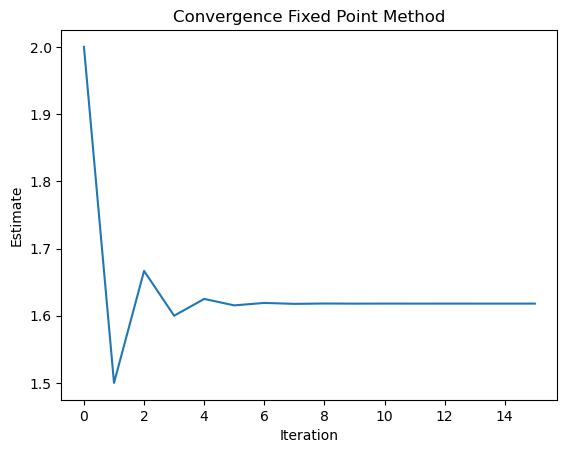

In [137]:
initial_guess = 2
estimates = fixed_point_iteration(g,initial_guess)
print ("Root Obtained =",estimates[-1])

plt.figure()
plt.title('Convergence Fixed Point Method')
plt.xlabel('Iteration')
plt.ylabel('Estimate')
plt.plot(estimates)
plt.show()

# Fractal

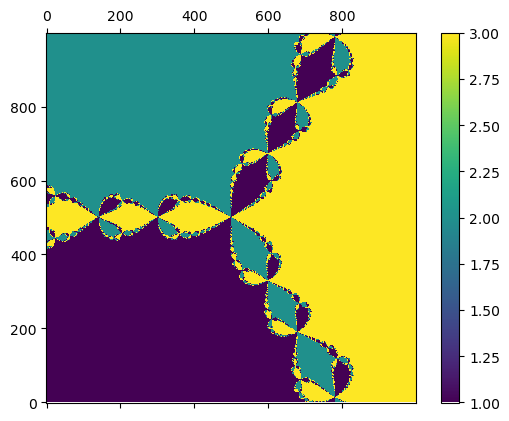

In [138]:
gsize = 1000
xvl =  np.linspace(-2,2,gsize)

# The function chosen has complex roots
def f(x):
    return x**3 -1
def df(x):
    return 3*x**2 
tol  = 1e-7
max_iter = 200

points  = np.zeros((gsize,gsize))

# The roots are cube roots of 1
r1 = -0.5-0.8660254j
r2 = -0.5 +0.8660254j
r3=1

for r in range(gsize):
    for i in range(gsize):
        pt = complex(xvl[r],xvl[i])
        for n in range(max_iter):
            # We used Newton-Raphson Method here
            pt_new  = pt - f(pt)/df(pt)
            if abs(pt_new-pt)<tol:
                if abs(pt_new-r1)<tol:
                    points[i][r]=1
                    break
                if abs(pt_new-r2)<tol:
                    points[i][r]=2
                    break
                points[i][r]=3
                break
            pt= pt_new

plot = plt.figure()
axes = plot.add_subplot(111)
y = axes.matshow(points,interpolation  = 'nearest',origin = 'lower')
plot.colorbar(y)

plt.show()